### Abstract

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/credit-risk/train.csv"
df_train = pd.read_csv(url)

In [3]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

Explore the data...

/var/folders/sy/9tmrg3gx65vf4qjw8jl8ytsc0000gn/T/ipykernel_4597/3944658184.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1 = sns.scatterplot(df_train[df_train["cb_person_default_on_file"] == "N"][df_train["person_income"]<2000000], x = "person_income", y = 'loan_int_rate', hue = "loan_status", style = "loan_status", ax = ax[0])
/var/folders/sy/9tmrg3gx65vf4qjw8jl8ytsc0000gn/T/ipykernel_4597/3944658184.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p5 = sns.scatterplot(df_train[df_train["person_age"] < 100][df_train["person_emp_length"] < 100], x = "person_age", y = "person_emp_length", hue = "loan_intent", ax = ax[4], legend = False)


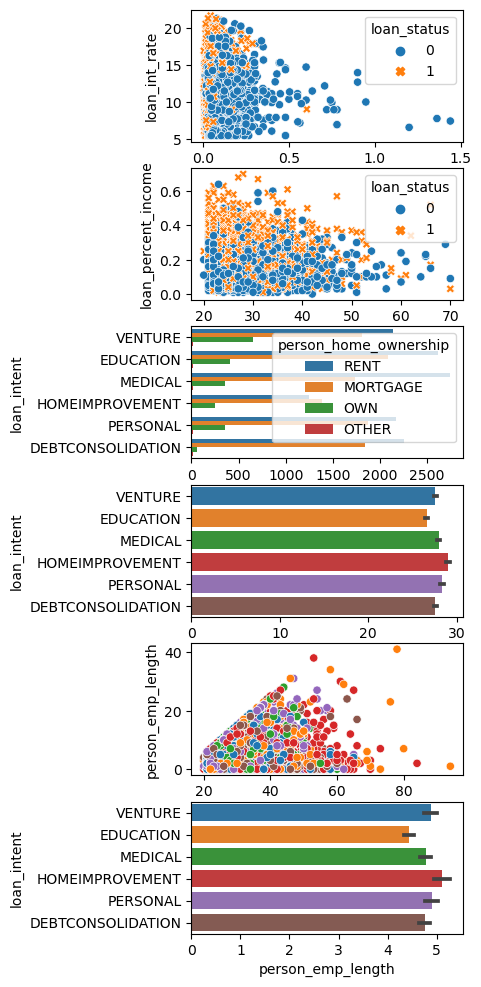

In [4]:
fig, ax = plt.subplots(6, 1, figsize = (3.5, 12))
# cut out the huge outlier--person making 6m/yr--so that we can see patterns more clearly
p1 = sns.scatterplot(df_train[df_train["cb_person_default_on_file"] == "N"][df_train["person_income"]<2000000], x = "person_income", y = 'loan_int_rate', hue = "loan_status", style = "loan_status", ax = ax[0])
p2 = sns.scatterplot(df_train[df_train["cb_person_default_on_file"] == "Y"], x = "person_age", y = 'loan_percent_income', hue = "loan_status", style = "loan_status", ax = ax[1])
p3 = sns.countplot(df_train, y = 'loan_intent', hue = 'person_home_ownership', ax = ax[2])
p4 = sns.barplot(df_train, x = "person_age", y = "loan_intent", ax = ax[3])
p5 = sns.scatterplot(df_train[df_train["person_age"] < 100][df_train["person_emp_length"] < 100], x = "person_age", y = "person_emp_length", hue = "loan_intent", ax = ax[4], legend = False)
p6 = sns.barplot(df_train, x = "person_emp_length", y = "loan_intent")

/var/folders/sy/9tmrg3gx65vf4qjw8jl8ytsc0000gn/T/ipykernel_4597/1900644483.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p4 = sns.scatterplot(df_train[df_train['person_emp_length'] < 100][df_train['person_income'] < 205000], x = "person_age", y = 'person_income', hue = "loan_intent", style = "loan_intent")


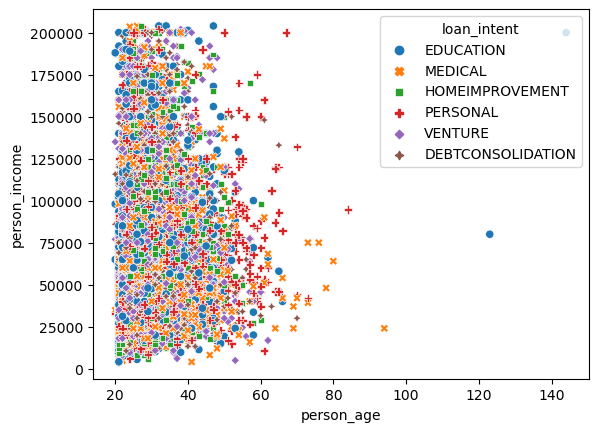

In [5]:
p4 = sns.scatterplot(df_train[df_train['person_emp_length'] < 100][df_train['person_income'] < 205000], x = "person_age", y = 'person_income', hue = "loan_intent", style = "loan_intent")

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train["loan_status"])

def prepare_data(df):
  df = df.dropna()
  y = le.transform(df["loan_status"])
  df = df.drop(["loan_status"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

x_train, y_train = prepare_data(df_train)
x_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,27,98000,3.0,11750,13.47,0.12,6,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,22,36996,5.0,10000,7.51,0.27,4,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,24,26000,2.0,1325,12.87,0.05,4,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,29,53004,2.0,15000,9.63,0.28,10,True,False,False,...,False,True,False,False,False,False,False,False,True,False
6,21,21700,2.0,5500,14.91,0.25,2,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26059,36,150000,8.0,3000,7.29,0.02,17,True,False,False,...,False,True,False,False,False,False,False,False,True,False
26060,23,48000,1.0,4325,5.42,0.09,4,False,False,False,...,True,True,False,False,False,False,False,False,True,False
26061,22,60000,0.0,15000,11.71,0.25,4,False,False,False,...,False,False,True,False,False,False,False,False,True,False
26062,30,144000,12.0,35000,12.68,0.24,8,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [7]:
#| output: false
from itertools import combinations
from sklearn.linear_model import LogisticRegression

all_qual_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
all_quant_cols = ['person_age', 'person_income', 'person_emp_length', "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
scores = []
combo_array = []


for qual in all_qual_cols:
  qual_cols = [col for col in x_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols                               #<1>
    combo_array.append(cols)                                    #<1>
    LR = LogisticRegression()                                   #<2>
    LR.fit(x_train[cols], y_train)                              #<2>
    new_score = LR.score(x_train[cols], y_train)                #<3>
    scores.append((cols, new_score, LR))                        #<4>

/Users/ellisterling/anaconda3/envs/ml-0451/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ellisterling/anaconda3/envs/ml-0451/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [8]:
from operator import itemgetter
best_combo = max(scores, key = itemgetter(1))
print(best_combo)
best_attrs = best_combo[0]
best_score = best_combo[1]
best_lr = best_combo[2]

(['person_emp_length', 'loan_percent_income', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT'], 0.8482559916182826, LogisticRegression())


Test with cross-validation

In [78]:
#| output: false
from sklearn.model_selection import cross_val_score
cv_scores_LR = cross_val_score(best_lr, x_train[best_attrs], y_train, cv=5)
print(cv_scores_LR.mean())
cv_scores_LR

0.8484738026069572


array([0.85268442, 0.85486687, 0.84042785, 0.84566688, 0.84872299])

This is decent, so we will continue with this LR model.

In [ ]:
w = pd.Series(best_lr.coef_[0])
w

0   -0.019247
1    8.281007
2   -0.735289
3   -0.107546
4   -1.795208
5    0.265245
dtype: float64

In [60]:
def score_function(w, x):
    return x@w

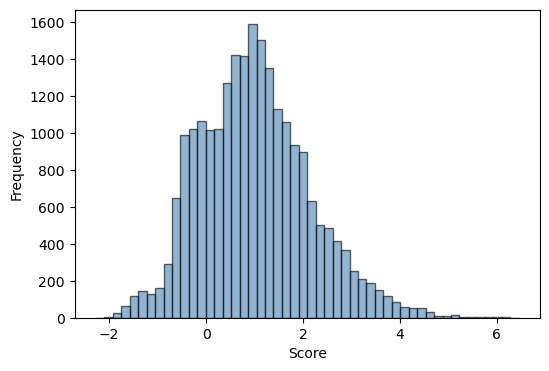

In [77]:
scores = score_function(w.values, x_train[best_attrs])
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
hist = ax.hist(scores, bins = 50, color = "steelblue", alpha = 0.6, linewidth = 1, edgecolor = "black")
labs = ax.set(xlabel = r"Score", ylabel = "Frequency") 

In [84]:
def get_benefit(loan_amt, loan_int_rate, default):
    if default == True:
        cost = loan_amt*(1 + 0.25*loan_int_rate)**10 - loan_amt
    else:
        cost = loan_amt*(1 + 0.25*loan_int_rate)**3 - 1.7*loan_amt
    return cost

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

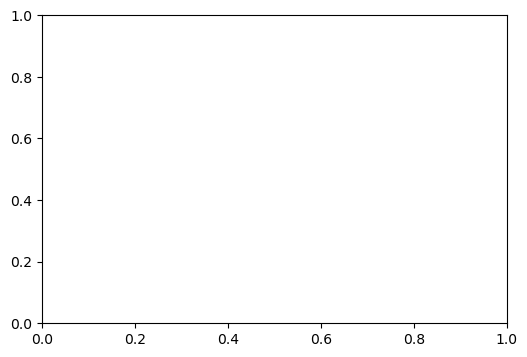

In [ ]:
best_benefit = 0
best_threshold = 0

fig, ax = plt.subplots(1, 1, figsize = (6, 4))
for t in np.linspace(0, 1, 101): 
    y_pred = scores >= t
    tn = ((y_pred == 0) & (y_train == 0)).mean()
    fn = ((y_pred == 0) & (y_train == 1)).mean()
    
    benefit_ = get_benefit(x_train["loan_amnt"], x_train["loan_int_rate"], x_train["cb_person_default_on_file_Y"])
    ax.scatter(t, benefit, color = "steelblue", s = 10)
    if benefit > best_benefit: 
        best_benefit = benefit
        best_threshold = t

ax.axvline(best_threshold, linestyle = "--", color = "grey", zorder = -10)
labs = ax.set(xlabel = r"Threshold $t$", ylabel = "Net benefit", title = f"Best benefit ${best_benefit:.2f} at best threshold t = {best_threshold:.3f}")